## Machine learning basics

In [78]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats


Population data to predict election result based on religion 

In [2]:
df = pd.read_csv("religion.csv")
df.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


Plot

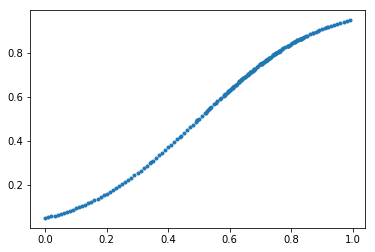

In [3]:
x=df.rfrac.values
f=df.promney.values
plt.plot(x,f,'.')

In [4]:
## function related to plotting
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

Taking sample from population

In [5]:
#allindexes=np.sort(np.random.choice(x.shape[0], size=100, replace=False))
indexes=np.sort(np.random.choice(x.shape[0], size=30, replace=False))

In [6]:
samplex = x[indexes]
samplef = f[indexes]

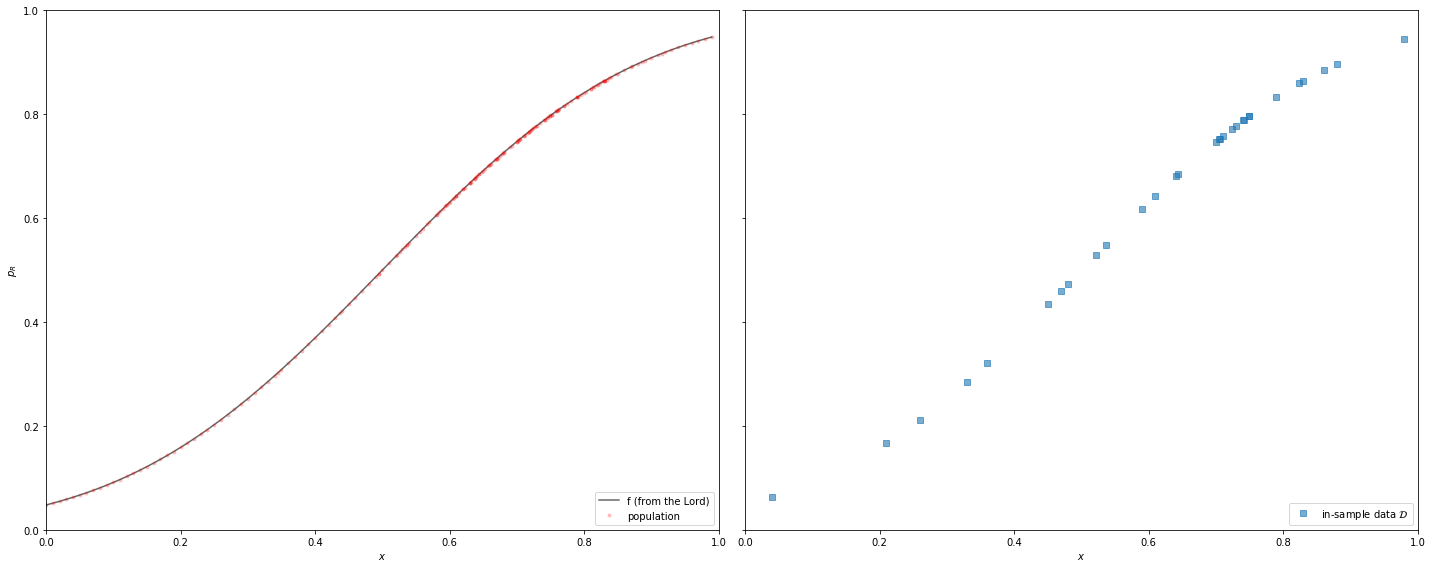

In [8]:
axes=make_plot()
axes[0].plot(x,f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(x,f, 'r.', alpha=0.2, label="population");
axes[1].plot(samplex,samplef, 's', alpha=0.6, label="in-sample data $\cal{D}$");
axes[0].legend(loc=4);
axes[1].legend(loc=4);

In [9]:
(axes[0].plot)

<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x12400c518>>

Line/Function  fitting the sample values

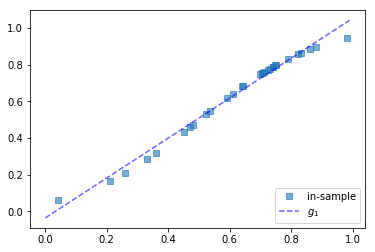

In [10]:
g1 = np.poly1d(np.polyfit(x[indexes],f[indexes],1))
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g1(x), 'b--', alpha=0.6, label="$g_1$");
plt.legend(loc=4);

**Error = Bias (differernece in function fitted and actual values)** 

Fitting 20 degree polynomial


In [11]:
g20 = np.poly1d(np.polyfit(x[indexes],f[indexes],20))

/anaconda2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


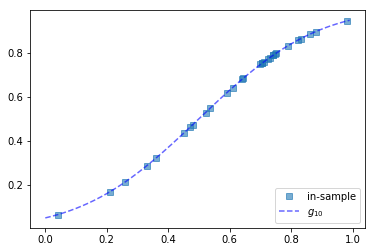

In [12]:
plt.plot(x[indexes],f[indexes], 's', alpha=0.6, label="in-sample");
plt.plot(x,g20(x), 'b--', alpha=0.6, label="$g_{10}$");
plt.legend(loc=4);

Bias almost zero with 20th degree polynomial function(complex)

Comparing both cases now

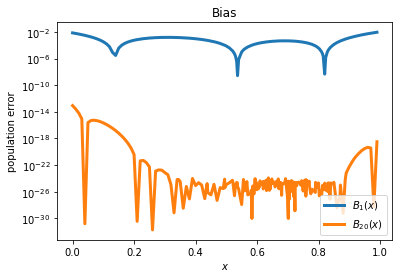

In [13]:
plt.plot(x, (g1(x)-f)**2, lw=3, label="$B_1(x)$")
plt.plot(x, (g20(x)-f)**2, lw=3,label="$B_{20}(x)$");
plt.xlabel("$x$")
plt.ylabel("population error")
plt.yscale("log")
plt.legend(loc=4);
plt.title("Bias");

**Overfitting vs Underfitting**
1. Under fit = High bias (has more difference between predicted values and actual values== high error)
2. Over fit = high variance (cannot generalize well for unseen data)

**To avoid underfitting/high bias**
1.  Add more features ---> can cause overfitting (if in excess)
2. Add more training data
3. Increase complexity/user better models ---> this can cause overfitting(if in excess)

**To avoid ovefitting/high variance**
1. Do train/validation/test split - Cross validation
2. Dimensinality reduction(Principal components reduction)
3. Regularization -> smoothen the coeeficients or remove some of the coeefficients

### Train and test dataset 

In [22]:
sigma=0.06
mask=(x > 0.65) & (x < 0.8)
sigmalist=sigma+mask*0.03

y = f + sp.stats.norm.rvs(scale=sigmalist, size=200)
#the next three lines just ensure that y remains a probability
yadd = (y < 0.0) *(0.01-y)
ysub = (y > 1.0)*(y - 1.0)
y = y + yadd -ysub

In [23]:
df=pd.DataFrame(dict(x=x[indexes],f=f[indexes],y=y[indexes]))

In [24]:
df.head()

,x,f,y
0,0.04,0.062597,0.012025
1,0.21,0.166855,0.214094
2,0.26,0.211855,0.241672
3,0.33,0.285470,0.338654
4,0.36,0.320369,0.296422


In [25]:
from sklearn.model_selection import train_test_split

In [30]:
datasize= df.shape[0]
itrain, itest = train_test_split(range(30), train_size =24, test_size =6)

xtrain = df.x[itrain].values
ftrain =df.f[itrain].values
ytrain =df.f[itrain].values

xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

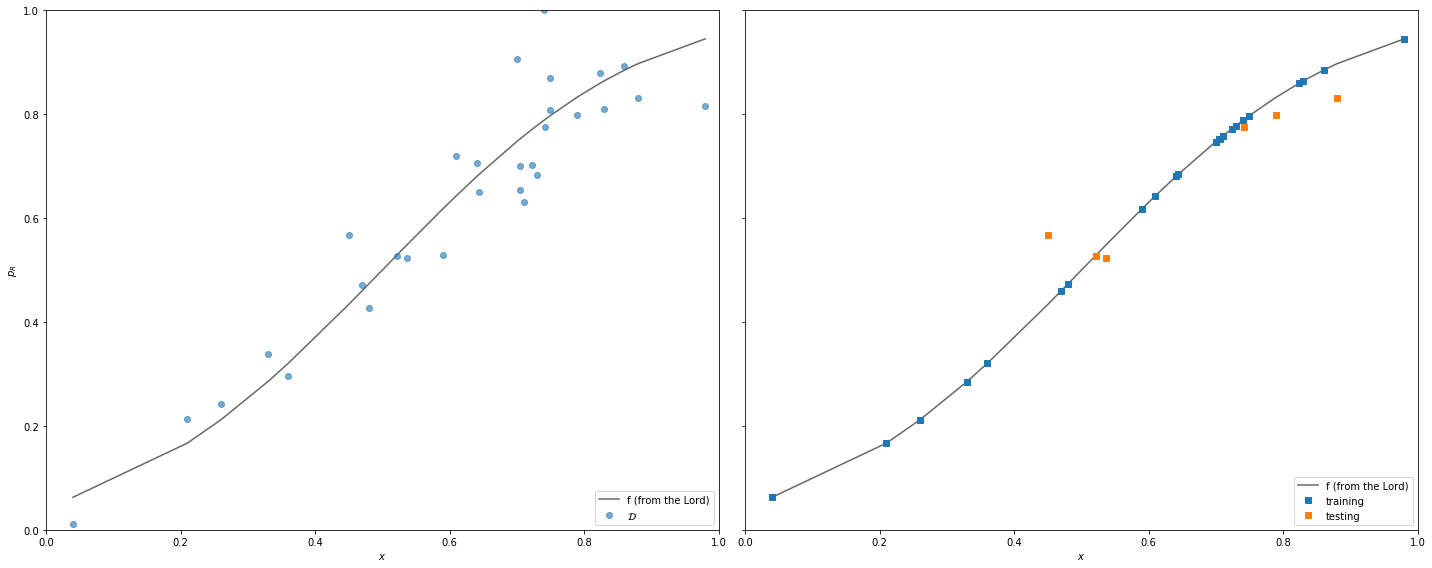

In [34]:
axes=make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

The scikit-learn is a useful python library for machine learning. So it needs to be understood as different ML algorithms have same way of implementation thru this library.

Scikit-learn expects data to be stored in a two-dimensional array or matrix with size `[n_samples, n_features]`

For more details check [Havard's CS109 lab for ML](https://github.com/arunmarria/2015lab5/blob/master/LearningModels.ipynb) 

In [36]:
xtrain

array([0.04      , 0.74865483, 0.74      , 0.7       , 0.21      ,
       0.98      , 0.82327336, 0.74990267, 0.73      , 0.33      ,
       0.59      , 0.47      , 0.70533267, 0.64111511, 0.48      ,
       0.70520676, 0.64410582, 0.71      , 0.72329536, 0.83021363,
       0.60910172, 0.36      , 0.26      , 0.86      ])

In [37]:
xtrain.reshape(-1,1)

array([[0.04      ],
       [0.74865483],
       [0.74      ],
       [0.7       ],
       [0.21      ],
       [0.98      ],
       [0.82327336],
       [0.74990267],
       [0.73      ],
       [0.33      ],
       [0.59      ],
       [0.47      ],
       [0.70533267],
       [0.64111511],
       [0.48      ],
       [0.70520676],
       [0.64410582],
       [0.71      ],
       [0.72329536],
       [0.83021363],
       [0.60910172],
       [0.36      ],
       [0.26      ],
       [0.86      ]])

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
## converting features to 2 degree polynomial for example (terms will be x0,x1, x2)
PolynomialFeatures(2).fit_transform(xtrain.reshape(-1,1))[:5]

array([[1.        , 0.04      , 0.0016    ],
       [1.        , 0.74865483, 0.56048406],
       [1.        , 0.74      , 0.5476    ],
       [1.        , 0.7       , 0.49      ],
       [1.        , 0.21      , 0.0441    ]])

In [42]:
## now trying differnt degrees on features

def make_features(train_set, test_set, degrees):
    trainTestList =[]
    for d in degrees:
        trainTestDic ={}
        trainTestDic['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        trainTestDic['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        trainTestList.append(trainTestDic)
        
    return trainTestList

Importing LinearRegression model and metrics(MSError) to evaluate model for each degree of polynomial fit.

In [44]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [45]:
## doing for 20 degrees
degrees = range(21)
error_train = np.empty(len(degrees))
error_test = np.empty(len(degrees))

In [48]:
## now make features for 20 degrees(for fitting linear regression 20 times --20 diff models with increasing 
#complexity)

trainTestLists =make_features(xtrain, xtest, degrees)

In [49]:
len(trainTestLists)

21

In [50]:
## Features transformed for third degree polynomial for train and test set

trainTestLists[3]

{'train': array([[1.00000000e+00, 4.00000000e-02, 1.60000000e-03, 6.40000000e-05],
        [1.00000000e+00, 7.48654834e-01, 5.60484060e-01, 4.19609101e-01],
        [1.00000000e+00, 7.40000000e-01, 5.47600000e-01, 4.05224000e-01],
        [1.00000000e+00, 7.00000000e-01, 4.90000000e-01, 3.43000000e-01],
        [1.00000000e+00, 2.10000000e-01, 4.41000000e-02, 9.26100000e-03],
        [1.00000000e+00, 9.80000000e-01, 9.60400000e-01, 9.41192000e-01],
        [1.00000000e+00, 8.23273364e-01, 6.77779032e-01, 5.57997423e-01],
        [1.00000000e+00, 7.49902667e-01, 5.62354010e-01, 4.21710772e-01],
        [1.00000000e+00, 7.30000000e-01, 5.32900000e-01, 3.89017000e-01],
        [1.00000000e+00, 3.30000000e-01, 1.08900000e-01, 3.59370000e-02],
        [1.00000000e+00, 5.90000000e-01, 3.48100000e-01, 2.05379000e-01],
        [1.00000000e+00, 4.70000000e-01, 2.20900000e-01, 1.03823000e-01],
        [1.00000000e+00, 7.05332672e-01, 4.97494178e-01, 3.50898898e-01],
        [1.00000000e+00, 6.41

Now creating models for 0-20 degrees and measuring test and train error

In [53]:
for d in degrees:
    Xtrain = trainTestLists[d]['train']
    Xtest = trainTestLists[d]['test']
    # set up model
    est = LinearRegression()
    # fit the model on training data
    est.fit(Xtrain, ytrain)
    
    # predict 
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    
    error_train[d]= mean_squared_error(prediction_on_training, ytrain)
    error_test[d] = mean_squared_error(prediction_on_test, ytest)

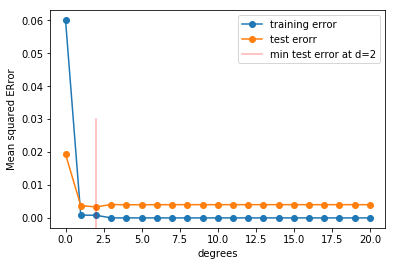

In [66]:
plt.plot(degrees, error_train, marker='o', label = 'training error')
plt.plot(degrees, error_test, marker= 'o', label ='test erorr')

plt.xlabel('degrees')
plt.ylabel('Mean squared ERror')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.legend(loc = 'upper right')

By choosing value of d based on test set error; the test set gets contaminated(not exactly unseen data) -- So the purpsoe is defeated tahts the reason we use validation set to validate error. More details can be found at [Havard's CS109 lab for ML](https://github.com/arunmarria/2015lab5/blob/master/LearningModels.ipynb) 

### Validation set

- The **training set** is used here to fit parameters of the model - **Model coefficients**
- The **validation set**(subset of orginal training set) is use to select **hyperparameters** (degrres of polynomial in this example)
- The **test set** - unseen data --> act as unseen population

2


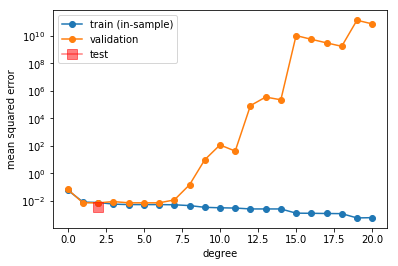

In [73]:
intrain, invalid = train_test_split(itrain, train_size =18, test_size =6)
#
xntrain = df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values

xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values


degrees = range(21)
error_train = np.empty(len(degrees))
error_valid = np.empty(len(degrees))


trainValidLists = make_features(xntrain, xnvalid, degrees)

for d in degrees: 
    Xntrain = trainValidLists[d]['train']
    Xnvalid = trainValidLists[d]['test']
    
    # model
    est = LinearRegression()
    
    # fit model 
    est.fit(Xntrain, yntrain)
    
    
    #predict on new training and validation sets and calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))
    
    
# calculating degree for which validation error is minimized

mindeg = np.argmin(error_valid)

ttlist = make_features(xtrain, xtest, degrees)

clf = LinearRegression()


clf.fit(ttlist[mindeg]['train'], ytrain)

pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)


err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
print (mindeg)

Lets do this again, choosing a new random split between training and validation data:

4


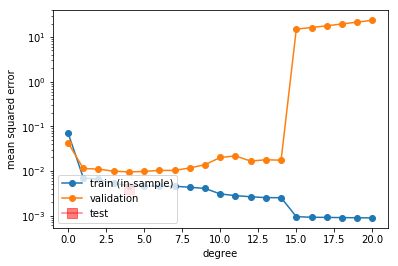

In [74]:
intrain,invalid = train_test_split(itrain,train_size=18, test_size=6)
xntrain= df.x[intrain].values
fntrain = df.f[intrain].values
yntrain = df.y[intrain].values
xnvalid= df.x[invalid].values
fnvalid = df.f[invalid].values
ynvalid = df.y[invalid].values

degrees=range(21)
error_train=np.empty(len(degrees))
error_valid=np.empty(len(degrees))
trainvalidlists=make_features(xntrain, xnvalid, degrees)

for d in degrees:#for increasing polynomial degrees 0,1,2...
    #Create polynomials from x
    Xntrain = trainvalidlists[d]['train']
    Xnvalid = trainvalidlists[d]['test']
    #fit a model linear in polynomial coefficients on the training set
    est = LinearRegression()
    est.fit(Xntrain, yntrain)
    #calculate mean squared error
    error_train[d] = mean_squared_error(yntrain, est.predict(Xntrain))
    error_valid[d] = mean_squared_error(ynvalid, est.predict(Xnvalid))

mindeg = np.argmin(error_valid)
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(ytest, pred)
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_valid, marker='o', label='validation')
plt.plot([mindeg], [err], marker='s', markersize=10, label='test', alpha=0.5, color='r')

plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='lower left')
plt.yscale("log")
print (mindeg)

### Cross Validation

The minimum error in previous case occurred at 4 for different validation set. This is because validation set is different; to overcome this we can use multiple validation set and find averege value of hyperparameter for which error in each validation set is minimum. And use that value to predict test set or unkown values. See [Havard's CS109 lab for ML](https://github.com/arunmarria/2015lab5/blob/master/LearningModels.ipynb) for more details on cross validation 

In [79]:
from sklearn.model_selection import KFold

In [140]:

n_folds=4
degrees=range(21)
results=[]
for d in degrees:
    hypothesisresults=[]
    for train, test in KFold(n_folds).split(range(24)): # split data into train/test groups, 4 times
        tvlist=make_features(xtrain[train], xtrain[test], degrees)
        clf = LinearRegression()
        clf.fit(tvlist[d]['train'], ytrain[train]) # fit
        hypothesisresults.append(mean_squared_error(ytrain[test], clf.predict(tvlist[d]['test']))) # evaluate score function on held-out data
    results.append((np.mean(hypothesisresults), np.min(hypothesisresults), np.max(hypothesisresults))) # average

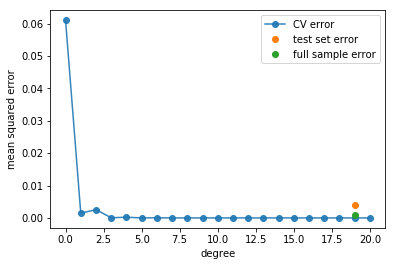

In [141]:
mindeg = np.argmin([r[0] for r in results])
ttlist=make_features(xtrain, xtest, degrees)
#fit on whole training set now.
clf = LinearRegression()
clf.fit(ttlist[mindeg]['train'], ytrain) # fit
pred = clf.predict(ttlist[mindeg]['test'])
err = mean_squared_error(pred, ytest)
errtr=mean_squared_error(ytrain, clf.predict(ttlist[mindeg]['train']))
errout=0.8*errtr+0.2*err

#plt.errorbar(degrees, [r[0] for r in results], yerr=[r[1] for r in results], marker='o', label='CV error', alpha=0.5)
plt.plot(degrees, [r[0] for r in results], marker='o', label='CV error', alpha=0.9)

plt.plot([mindeg], [err], 'o',  label='test set error')
plt.plot([mindeg], [errout], 'o',  label='full sample error')


plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper right')



### Regularization


Intuition behind regularization can be found at [Andrew Ng's course page](http://www.holehouse.org/mlclass/07_Regularization.html)

In [145]:
def plot_functions(est, ax, df, alpha, xtest, Xtest, xtrain, ytrain):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(df.x, df.f, color='k', label='f')
    ax.plot(xtrain, ytrain, 's', label="training", alpha=0.4)
    ax.plot(xtest, ytest, 's', label="testing", alpha=0.6)
    transx=np.arange(0,1.1,0.01)
    transX = PolynomialFeatures(20).fit_transform(transx.reshape(-1,1))
    ax.plot(transx, est.predict(transX),  '.', label="alpha = %s" % str(alpha))
    ax.set_ylim((0, 1))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='lower right')
    
def plot_coefficients(est, ax, alpha):
    coef = est.coef_.ravel()
    ax.semilogy(np.abs(coef), marker='o', label="alpha = %s" % str(alpha))
    ax.set_ylim((1e-1, 1e15))
    ax.set_ylabel('abs(coefficient)')
    ax.set_xlabel('coefficients')
    ax.legend(loc='upper left')

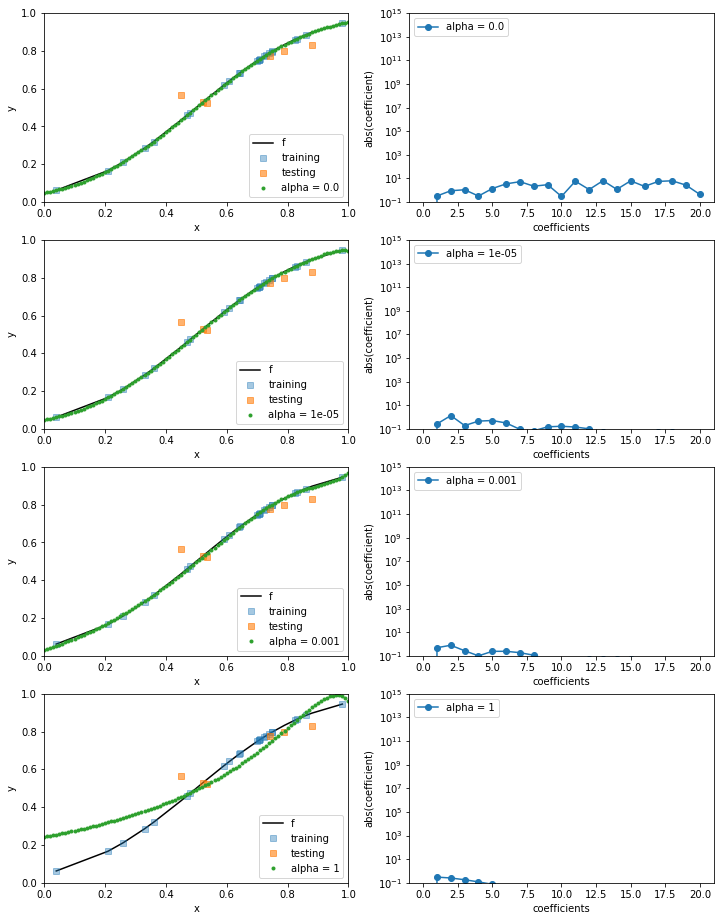

In [148]:
from sklearn.linear_model import Ridge
fig, rows = plt.subplots(4, 2, figsize=(12, 16))
d=20
alphas = [0.0, 1e-5, 1e-3, 1]
Xtrain = trainTestLists[d]['train']
Xtest = trainTestLists[d]['test']
for i, alpha in enumerate(alphas):
    l,r=rows[i]
    est = Ridge(alpha=alpha)
    est.fit(Xtrain, ytrain)
    plot_functions(est, l, df, alpha, xtest, Xtest, xtrain, ytrain )
    plot_coefficients(est, r, alpha)

Upto now we have focussed on finding the polynomial with the right degree of complecity $d=*$ given the data that we have.

Let us now ask a different question: if we are going to fit the data with an expressive model such as 20th order polynomials, how can we **regularize** or smooth or restrict the choices of the kinds of 20th order polynomials that we allow in our fits. In other words, we are again trying to bring down the complexity of the hypothesis space, but by a different tack: a tack which prefers smooth polynomials over wiggly ones.

That is, if we want to fit with a 20th order polynomial, ok, lets fit with it, but lets reduce the size of, or limit the functions in $\cal{H}_{20}$ that we allow.

In a sense we have already done this, havent we? When we compared $\cal{H}_1$ over $\cal{H}_{10}$, we imposed a **hard constraint** by setting all polynomial co-efficients for terms higher than $x$ to 0. Instead we might want to set a **soft constraint** by setting:

$$\sum_{i=0}^j a_i^2 < C.$$

We can do this by adding a term to the empirical risk that we minimize on the training data for $\cal{H}_j$ (seeing why is beyond the scope of this lab but google on lagrange multipliers and the dual problem):

$$\cal{R}(h_j) =  \sum_{y_i \in \cal{D}} (y_i - h_j(x_i))^2 +\alpha \sum_{i=0}^j a_i^2.$$

This new risk takes the empirical risk and adds a "penalty term" to it to minimize overfitting. The term is proportional to the sum of the squares of the coefficients and is positive, so it will keep their values down

Notice that we are adding a term to the **training error**, once $\alpha$ is defined. The entire structure is similar to what we did to find the optimal $d=*$, with $\alpha$ being the analog of $d$. And thus we can use the same validation and cross-validation technology that we developed to estimate $d$.

This technique is called **regularization** or **shrinkage** as it takes the coefficients $a_i$ towards smaller sizes. As you have seen earlier, for polynomials this corresponds to choosing smooth functions over wiggly functions. When $\alpha=0$ we have the regular polynomial regression problem, and if we are using 20th order polynomials we will wildly overfit. We are in the high variance zone. The problem with a non-zero $\alpha$ is called **ridge regression**. As $\alpha$ increases, the importance of the penalty term increases at the expense of the ERM term, and we are pushed to increase the smoothness of the polynomials. When $\alpha$ becomes very large the penalty term dominates and we get into the high bias zone. Thus $\alpha$ acts as a complexity parameter just like $d$ did, with high complexity being $\alpha \to 0$.
